In [115]:
!pip install nltk


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [49]:
!pip install wordcloud

   ---------------------------------------- 0.0/299.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/299.9 kB ? eta -:--:--
   --- ----------------------------------- 30.7/299.9 kB 325.1 kB/s eta 0:00:01
   ------ -------------------------------- 51.2/299.9 kB 372.4 kB/s eta 0:00:01
   ---------------------- --------------- 174.1/299.9 kB 952.6 kB/s eta 0:00:01
   -------------------------------------- - 286.7/299.9 kB 1.4 MB/s eta 0:00:01
   ---------------------------------------- 299.9/299.9 kB 1.2 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [45]:
import requests
from bs4 import BeautifulSoup
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, SnowballStemmer, LancasterStemmer
import re
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')  # For POS tagging (optional, but recommended)
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\keert\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\keert\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\keert\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\keert\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\keert\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

<h2>Scrapping Data Using Beautiful Soup</h2>

In [3]:
url = "https://www.geeksforgeeks.org/ml-heart-disease-prediction-using-logistic-regression/"
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')
text = soup.get_text()

<h2>Data Cleaning</h2>

In [27]:
text = text.strip()
text=text.lower()
i=0
documents = {}
def segmenting_documents(text,start,end):
    global i
    start=start.lower()
    end=end.lower()
    start_index = text.find(start)
    end_index=text.find(end)
    documents[i]= text[start_index:end_index+len(end)]
    i=i+1
    

segmenting_documents(text,"world health organization","overall risk using logistic regression")
segmenting_documents(text,"Logistic Regression is a statistical","To know more about it, click here.")
segmenting_documents(text,"The dataset is from an","over 4,000 records and 15 attributes")
print(documents)

{0: 'world health organization has estimated that four out of five cardiovascular disease (cvd) deaths are due to heart attacks. this whole research intends to pinpoint the ratio of patients who possess a good chance of being affected by cvd and also to predict the overall risk using logistic regression', 1: 'logistic regression is a statistical and machine-learning technique classifying records of a dataset based on the values of the input fields. it predicts a dependent variable based on one or more sets of independent variables to predict outcomes. it can be used both for binary classification and multi-class classification. to know more about it, click here.', 2: 'the dataset is from an ongoing cardiovascular study on residents of the town of framingham, massachusetts. the classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (chd). the dataset provides the patients’ information. it includes over 4,000 records and 15 attributes'}


<h2>Tokenization</h2><p>Tokenize the above scrapped data into sentences</p>

In [28]:
sentences = sent_tokenize(documents[0])
sentences

['world health organization has estimated that four out of five cardiovascular disease (cvd) deaths are due to heart attacks.',
 'this whole research intends to pinpoint the ratio of patients who possess a good chance of being affected by cvd and also to predict the overall risk using logistic regression']

<p>Tokenize the above scrapped data into words</p>

In [29]:
doc1_tokens=word_tokenize(documents[0])
print(doc1_tokens)
doc2_tokens=word_tokenize(documents[1])
doc3_tokens=word_tokenize(documents[2])

['world', 'health', 'organization', 'has', 'estimated', 'that', 'four', 'out', 'of', 'five', 'cardiovascular', 'disease', '(', 'cvd', ')', 'deaths', 'are', 'due', 'to', 'heart', 'attacks', '.', 'this', 'whole', 'research', 'intends', 'to', 'pinpoint', 'the', 'ratio', 'of', 'patients', 'who', 'possess', 'a', 'good', 'chance', 'of', 'being', 'affected', 'by', 'cvd', 'and', 'also', 'to', 'predict', 'the', 'overall', 'risk', 'using', 'logistic', 'regression']


<h2>Removing Stop Words from the above tokens</h2><p>By removing stopwords, we reduce the number of unique words in a document, leading to smaller datasets.Smaller datasets require less computational resources to process, leading to faster training and inference times for machine learning models.</p>

In [30]:
stop_words = set(stopwords.words('english'))
stop_words
doc1_tokens = [token for token in doc1_tokens if token not in stop_words]
doc2_tokens = [token for token in doc2_tokens if token not in stop_words]
doc3_tokens = [token for token in doc3_tokens if token not in stop_words]
doc1_tokens

['world',
 'health',
 'organization',
 'estimated',
 'four',
 'five',
 'cardiovascular',
 'disease',
 '(',
 'cvd',
 ')',
 'deaths',
 'due',
 'heart',
 'attacks',
 '.',
 'whole',
 'research',
 'intends',
 'pinpoint',
 'ratio',
 'patients',
 'possess',
 'good',
 'chance',
 'affected',
 'cvd',
 'also',
 'predict',
 'overall',
 'risk',
 'using',
 'logistic',
 'regression']

<h2>Porter Stemmer</h2><p>A popular stemming algorithm that removes common suffixes like "s", "ed", "ing", etc.</p>
<h2>Snowball Stemmer</h2><p> A more advanced version of the Porter Stemmer, with additional rules and language support.</p>
<h2>Lancaster Stemmer</h2><p>Aggressive stemming algorithm that removes a large number of suffixes. Can sometimes over-stem, leading to non-word stems. Faster than the Porter and Snowball stemmers.</p>
<h2>Regexp Stemmer</h2><p>Uses regular expressions to define stemming rules.Highly customizable but requires careful rule design.  
</p>

In [31]:
porter_stemmer = PorterStemmer()
snowball_stemmer = SnowballStemmer(language='english')
lancaster_stemmer = LancasterStemmer()
def regexp_stemmer(token):
  return re.sub(r'(ss|ies|s|es|ed|ing)$', '', token)

porter_tokens, snowball_tokens,lancaster_tokens,regexp_tokens = zip(*[(porter_stemmer.stem(token), snowball_stemmer.stem(token), lancaster_stemmer.stem(token),regexp_stemmer(token)) for token in doc1_tokens])
print("Tokens          PorterTokens             SnowballTokens              LancasterTokens         RegexpTokens")
for i in range(len(doc1_tokens)):
    print(f"{doc1_tokens[i]:<20}\t{porter_tokens[i]:<20}\t{snowball_tokens[i]:<20}\t{lancaster_tokens[i]:<20}\t{regexp_tokens[i]}")

Tokens          PorterTokens             SnowballTokens              LancasterTokens         RegexpTokens
world               	world               	world               	world               	world
health              	health              	health              	heal                	health
organization        	organ               	organ               	org                 	organization
estimated           	estim               	estim               	estim               	estimat
four                	four                	four                	four                	four
five                	five                	five                	fiv                 	five
cardiovascular      	cardiovascular      	cardiovascular      	cardiovascul        	cardiovascular
disease             	diseas              	diseas              	diseas              	disease
(                   	(                   	(                   	(                   	(
cvd                 	cvd                 	cvd                 	cvd   

<p>:<24 format specifier ensures that each field is left-aligned and padded with spaces up to a width of 24 characters.</p>

<h2>Lemmatization</h2><p> It uses a morphological analysis of words to determine their base form or lemma. It considers the context of the word and its part of speech to produce accurate results.<br>
<b>WordNet Lemmatizer:</b> Uses the WordNet lexical database to find the lemma of a word.
</p>

In [32]:
lemmatizer = WordNetLemmatizer()
# Function to convert NLTK POS tags to WordNet POS tags
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN  # Default to noun if POS tag is unknown
# Get POS tags for each token
pos_tags_doc1 = pos_tag(doc1_tokens)

# Lemmatize each token with the correct POS tag
lemmatized_doc1_tokens = [lemmatizer.lemmatize(token, get_wordnet_pos(pos)) for token, pos in pos_tags_doc1]
pos_tags_doc2 = pos_tag(doc2_tokens)
lemmatized_doc2_tokens = [lemmatizer.lemmatize(token, get_wordnet_pos(pos)) for token, pos in pos_tags_doc2]
pos_tags_doc3 = pos_tag(doc3_tokens)
lemmatized_doc3_tokens = [lemmatizer.lemmatize(token, get_wordnet_pos(pos)) for token, pos in pos_tags_doc3]
for i in range(len(doc1_tokens)):
    print(f'{doc1_tokens[i]:<20}\t{lemmatized_doc1_tokens[i]}')

world               	world
health              	health
organization        	organization
estimated           	estimate
four                	four
five                	five
cardiovascular      	cardiovascular
disease             	disease
(                   	(
cvd                 	cvd
)                   	)
deaths              	death
due                 	due
heart               	heart
attacks             	attack
.                   	.
whole               	whole
research            	research
intends             	intend
pinpoint            	pinpoint
ratio               	ratio
patients            	patient
possess             	possess
good                	good
chance              	chance
affected            	affect
cvd                 	cvd
also                	also
predict             	predict
overall             	overall
risk                	risk
using               	use
logistic            	logistic
regression          	regression


In [33]:
print(lemmatized_doc1_tokens)
print(lemmatized_doc2_tokens)
print(lemmatized_doc3_tokens)

['world', 'health', 'organization', 'estimate', 'four', 'five', 'cardiovascular', 'disease', '(', 'cvd', ')', 'death', 'due', 'heart', 'attack', '.', 'whole', 'research', 'intend', 'pinpoint', 'ratio', 'patient', 'possess', 'good', 'chance', 'affect', 'cvd', 'also', 'predict', 'overall', 'risk', 'use', 'logistic', 'regression']
['logistic', 'regression', 'statistical', 'machine-learning', 'technique', 'classifying', 'record', 'dataset', 'base', 'value', 'input', 'field', '.', 'predicts', 'dependent', 'variable', 'base', 'one', 'set', 'independent', 'variable', 'predict', 'outcome', '.', 'use', 'binary', 'classification', 'multi-class', 'classification', '.', 'know', ',', 'click', '.']
['dataset', 'ongoing', 'cardiovascular', 'study', 'resident', 'town', 'framingham', ',', 'massachusetts', '.', 'classification', 'goal', 'predict', 'whether', 'patient', '10-year', 'risk', 'future', 'coronary', 'heart', 'disease', '(', 'chd', ')', '.', 'dataset', 'provide', 'patient', '’', 'information', 

<h2>Bag Of Words</h2><p>used to represent text documents as numerical vectors.</p>

In [51]:
# Assuming you have already defined the lemmatized document lists

# No need to modify individual elements, the vectorizer handles tokenization
lemmatized_documents = [lemmatized_doc1_tokens, lemmatized_doc2_tokens, lemmatized_doc3_tokens]
# Convert each document (list of tokens) to a string
document_strings = [" ".join(doc) for doc in lemmatized_documents]
# Create a CountVectorizer object
vectorizer = CountVectorizer()

# Fit the vectorizer to the documents and transform them into a matrix
X = vectorizer.fit_transform(document_strings)

# Print the document-term matrix
print(X.toarray())

# Get the feature names (vocabulary)
print(vectorizer.get_feature_names_out())

[[0 0 0 1 1 1 0 0 0 1 1 0 0 0 0 0 0 2 0 1 0 1 1 1 0 1 1 0 0 0 1 1 1 0 0 0
  0 1 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 1
  0]
 [0 0 0 0 0 0 0 2 1 0 0 0 1 2 1 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0
  1 0 1 1 1 1 0 1 1 0 0 1 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 0 1 0 1 1 2 0 0 0
  0]
 [1 1 1 0 0 0 1 0 0 1 0 1 0 1 0 0 1 0 2 0 0 1 0 0 0 0 0 1 1 1 0 0 1 1 0 1
  0 0 0 0 0 0 1 0 0 1 0 0 0 2 0 0 1 0 1 0 1 0 0 1 1 0 0 1 0 1 0 0 0 1 0 0
  1]]
['000' '10' '15' 'affect' 'also' 'attack' 'attribute' 'base' 'binary'
 'cardiovascular' 'chance' 'chd' 'class' 'classification' 'classifying'
 'click' 'coronary' 'cvd' 'dataset' 'death' 'dependent' 'disease' 'due'
 'estimate' 'field' 'five' 'four' 'framingham' 'future' 'goal' 'good'
 'health' 'heart' 'include' 'independent' 'information' 'input' 'intend'
 'know' 'learning' 'logistic' 'machine' 'massachusetts' 'multi' 'one'
 'ongoing' 'organization' 'outcome' 'overall' 'patient' 'pinpoint'
 'possess' 'predict' 'predicts' 'provide' 'rat

In [35]:
print(X.toarray().shape)
print(vectorizer.get_feature_names_out().shape)

(3, 73)
(73,)


In [40]:
combine_tokens=[]
combine_tokens.extend(lemmatized_doc1_tokens)
combine_tokens.extend(lemmatized_doc2_tokens)
combine_tokens.extend(lemmatized_doc3_tokens)
combine_tokens=list(set(combine_tokens))
print(len(combine_tokens))
print(combine_tokens)

75
['overall', '.', 'risk', 'research', ')', 'disease', 'estimate', 'framingham', 'pinpoint', 'chance', 'classification', 'regression', 'machine-learning', 'massachusetts', 'resident', 'affect', 'base', 'information', 'attribute', 'use', 'study', 'goal', '10-year', 'chd', '15', 'value', 'click', 'input', 'health', 'town', ',', 'know', 'predicts', 'whole', 'outcome', 'dependent', 'logistic', 'statistical', 'good', '’', 'due', 'ongoing', 'set', 'provide', 'independent', 'binary', 'dataset', 'technique', 'five', 'cvd', 'classifying', 'world', 'whether', 'variable', 'predict', 'attack', 'heart', 'intend', 'cardiovascular', 'record', 'field', 'include', 'ratio', 'organization', 'patient', 'one', 'four', '4,000', '(', 'multi-class', 'future', 'coronary', 'death', 'possess', 'also']


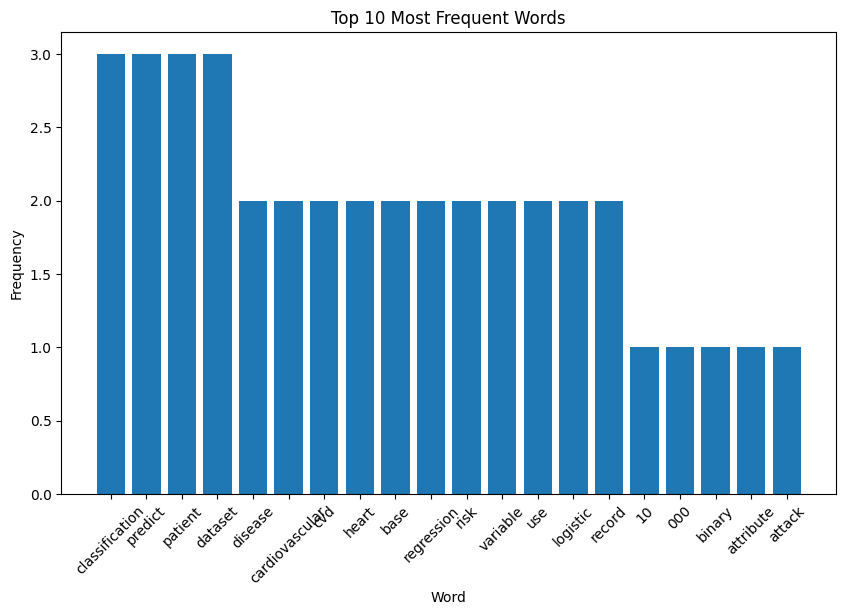

In [52]:
# Assuming X is your document-term matrix and vectorizer is your CountVectorizer object
word_counts = np.sum(X, axis=0).A1

# Get the feature names (vocabulary)
words = vectorizer.get_feature_names_out()

# Create a DataFrame to store word frequencies
word_freq_df = pd.DataFrame({'word': words, 'count': word_counts})

# Sort the DataFrame by word count in descending order
word_freq_df = word_freq_df.sort_values(by='count', ascending=False)

# Get the top 10 most frequent words
top_10_words = word_freq_df.head(20)

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_10_words['word'], top_10_words['count'])
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Top 10 Most Frequent Words')
plt.xticks(rotation=45)
plt.show()

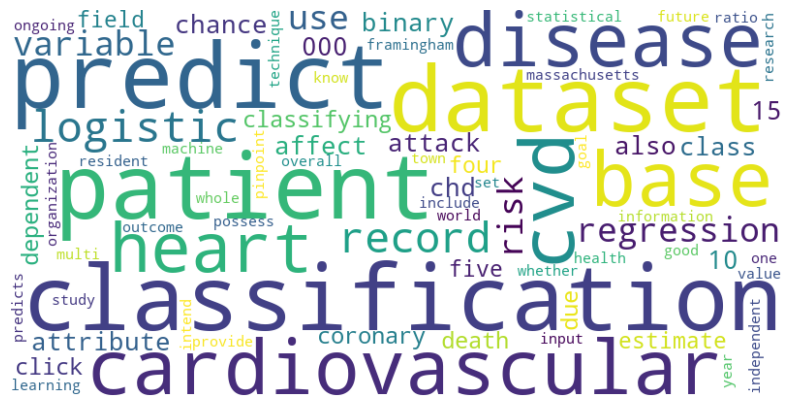

In [53]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Extract the most frequent words and their frequencies
word_frequencies = np.sum(X, axis=0).A1
word_freq_dict = dict(zip(vectorizer.get_feature_names_out(), word_frequencies))

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_dict)

# Display the generated image
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

<h2>Term Frequency-Inverse Document Frequency(TF-IDF)</h2>

In [58]:
# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit the vectorizer to the documents and transform them into a matrix
X = tfidf_vectorizer.fit_transform(document_strings)
tfidf_scores = X.toarray()
# Print the TF-IDF matrix
print(tfidf_scores)
feature_names=tfidf_vectorizer.get_feature_names_out()
# Get the feature names (vocabulary)
print(tfidf_vectorizer.get_feature_names_out())

[[0.         0.         0.         0.18577215 0.18577215 0.18577215
  0.         0.         0.         0.14128451 0.18577215 0.
  0.         0.         0.         0.         0.         0.3715443
  0.         0.18577215 0.         0.14128451 0.18577215 0.18577215
  0.         0.18577215 0.18577215 0.         0.         0.
  0.18577215 0.18577215 0.14128451 0.         0.         0.
  0.         0.18577215 0.         0.         0.14128451 0.
  0.         0.         0.         0.         0.18577215 0.
  0.18577215 0.14128451 0.18577215 0.18577215 0.10972003 0.
  0.         0.18577215 0.         0.14128451 0.18577215 0.
  0.14128451 0.         0.         0.         0.         0.
  0.14128451 0.         0.         0.         0.18577215 0.18577215
  0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.35052984 0.17526492 0.         0.         0.
  0.17526492 0.26658698 0.17526492 0.17526492 0.         0.
  0.13329349 0.         0.17526492 0.         0.       

In [59]:
print(tfidf_scores.shape)
print(feature_names.shape)

(3, 73)
(73,)


In [76]:
# Sum the TF-IDF scores across all documents
total_scores = X.sum(axis=0)
top_10_indices = total_scores.argsort()[::-1][:10]
# Get the top 10 words and their scores
top_10_words = [(feature_names[i], total_scores[0, i]) for i in top_10_indices]

print(top_10_words)
print("Top 10 words across all documents:")


[(array([['class', 'classifying', 'click', 'binary', 'field', 'dependent',
        'set', 'statistical', 'machine', 'multi', 'outcome', 'one',
        'input', 'know', 'learning', 'independent', 'predicts',
        'technique', 'value', 'good', 'organization', 'research',
        'intend', 'overall', 'estimate', 'five', 'four', 'health',
        'death', 'due', 'affect', 'also', 'possess', 'pinpoint', 'ratio',
        'chance', 'world', 'whole', 'attack', 'study', '000',
        'attribute', '10', '15', 'information', 'include', 'coronary',
        'resident', 'provide', 'ongoing', 'massachusetts', 'whether',
        'chd', 'goal', 'framingham', 'future', 'town', 'year', 'use',
        'logistic', 'regression', 'record', 'disease', 'cardiovascular',
        'risk', 'heart', 'predict', 'variable', 'base', 'cvd',
        'classification', 'dataset', 'patient']], dtype=object), matrix([[0.17526492, 0.17526492, 0.17526492, 0.17526492, 0.17526492,
         0.17526492, 0.17526492, 0.17526492

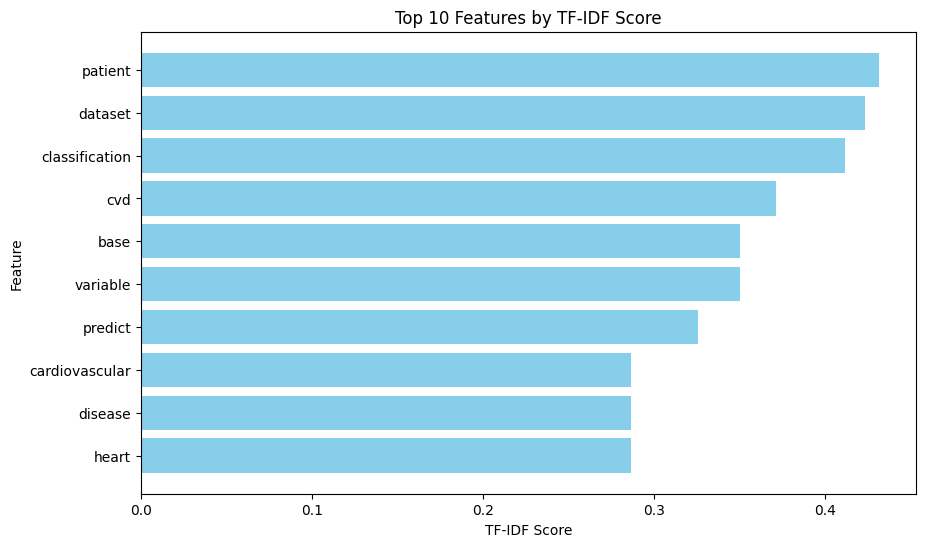

In [82]:
# Sum the TF-IDF scores across all documents to get the total score for each feature
tfidf_scores = X.sum(axis=0).A1  # Convert to a 1D array

# Create a DataFrame with feature names and scores
tfidf_df = pd.DataFrame({'feature': feature_names, 'tfidf_score': tfidf_scores})

# Sort by tf-idf score and get top 10 features
top_10_features = tfidf_df.nlargest(10, 'tfidf_score')

# Plot the top 10 features
plt.figure(figsize=(10, 6))
plt.barh(top_10_features['feature'], top_10_features['tfidf_score'], color='skyblue')
plt.xlabel('TF-IDF Score')
plt.ylabel('Feature')
plt.title('Top 10 Features by TF-IDF Score')
plt.gca().invert_yaxis()  # Invert y-axis for descending order
plt.show()

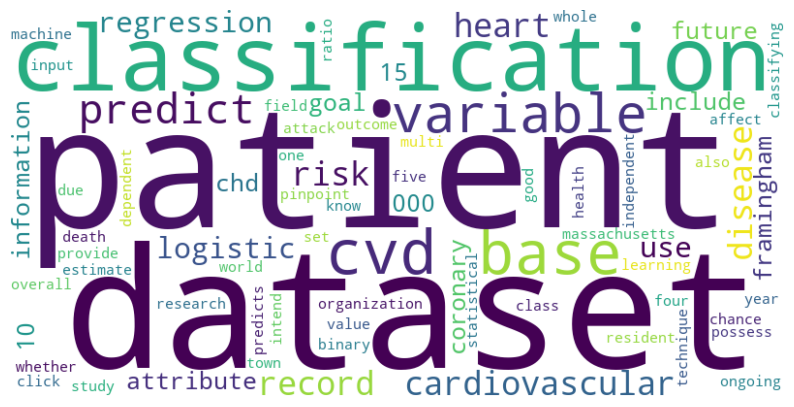

In [77]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Extract the most frequent words and their frequencies
word_frequencies = np.sum(X, axis=0).A1
word_freq_dict = dict(zip(tfidf_vectorizer.get_feature_names_out(), word_frequencies))

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_dict)

# Display the generated image
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()